In [ ]:
# import kagglehub

# # Download latest version
# path = kagglehub.dataset_download("hasibalmuzdadid/shoe-vs-sandal-vs-boot-dataset-15k-images")

# print("Path to dataset files:", path)

100%|██████████| 47.0M/47.0M [00:00<00:00, 166MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/hasibalmuzdadid/shoe-vs-sandal-vs-boot-dataset-15k-images/versions/2


In [ ]:
# !unzip /content/Dataset.zip -d /content/extracted

In [ ]:
# import libraries
import tensorflow as tf
import keras
import numpy as np
from sklearn.model_selection import train_test_split
import os
import matplotlib.pyplot as plt

In [ ]:
# buat nampung dimensions dari setiap gambar
img_rows, img_cols = 102, 136

# buat nampung path kta
data_path = path + "/Shoe vs Sandal vs Boot Dataset/"

# buat nampung label
x, y = [], []

# sebagai label kita 0, 1, 2, semisal 0 buat boot, 1 buat sandal etc
counter = 0

# ambil smua data name folder dari directory kita
classes = os.listdir(data_path)

# stiap classes yang ada di data path, dan stiap images yang ada disana, labelnya
# kita kasih sesuai counter
# dan kita proses menggunakan tensorflow (dari img to array)
for class_path in os.listdir(data_path):
    for img_path in os.listdir(f"{data_path}{class_path}"):
        path = f"{data_path}{class_path}/{img_path}"
        label = counter
        image = tf.keras.preprocessing.image.load_img(path, target_size=(img_rows, img_cols))
        image = tf.keras.preprocessing.image.img_to_array(image)
        x.append(image)
        y.append(label)
    counter += 1

x = np.array(x)
y = np.array(y)

In [ ]:
# dijadikan float supaya process model kita calculationnya lebih bagus
# also bagi 255 supaya [0, 255] to [0, 1] (normalisasi).
x = x.astype('float32') / 255.0

# 80 : 10 : 10
X_train, X_temp, y_train, y_temp = train_test_split(x, y, test_size=0.2, random_state=420)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=420)

# ubah jd one hot encoding
y_train = keras.utils.to_categorical(y_train, num_classes=3)
y_val = keras.utils.to_categorical(y_val, num_classes=3)
y_test = keras.utils.to_categorical(y_test, num_classes=3)

print(X_train.shape)

(12000, 102, 136, 3)


In [ ]:
model = keras.Sequential()
model.add(keras.layers.Conv2D(6, (5,5), activation='relu', input_shape=(img_rows, img_cols, 3)))
model.add(keras.layers.AveragePooling2D(pool_size=(2,2), strides=2))
model.add(keras.layers.Conv2D(6, (5,5), activation='relu'))
model.add(keras.layers.AveragePooling2D(pool_size=(2,2), strides=2))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(120, activation="relu"))
model.add(keras.layers.Dense(84, activation="relu"))
model.add(keras.layers.Dense(3, activation="softmax"))
model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 98, 132, 6)     │           456 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ average_pooling2d               │ (None, 49, 66, 6)      │             0 │
│ (AveragePooling2D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 45, 62, 6)      │           906 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ average_pooling2d_1             │ (None, 22, 31, 6)      │             0 │
│ (AveragePooling2D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 4092)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 120)            │       491,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 84)             │        10,164 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 3)              │           255 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 502,941 (1.92 MB)

 Trainable params: 502,941 (1.92 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['Accuracy'])
history = model.fit(X_train, y_train, batch_size=120, validation_data=(X_val, y_val), epochs=10)

score = model.evaluate(X_test, y_test)
print(f"Test Loss: {score[0]}")
print(f"Test Loss: {score[1]}")

Epoch 1/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 12s 57ms/step - Accuracy: 0.7450 - loss: 0.5750 - val_Accuracy: 0.8860 - val_loss: 0.2938
Epoch 2/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 12s 23ms/step - Accuracy: 0.9291 - loss: 0.1918 - val_Accuracy: 0.9413 - val_loss: 0.1557
Epoch 3/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - Accuracy: 0.9523 - loss: 0.1367 - val_Accuracy: 0.9533 - val_loss: 0.1318
Epoch 4/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - Accuracy: 0.9619 - loss: 0.1000 - val_Accuracy: 0.9613 - val_loss: 0.1117
Epoch 5/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - Accuracy: 0.9733 - loss: 0.0749 - val_Accuracy: 0.9647 - val_loss: 0.1108
Epoch 6/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - Accuracy: 0.9850 - loss: 0.0460 - val_Accuracy: 0.9587 - val_loss: 0.1178
Epoch 7/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - Accuracy: 0.9873 - loss: 0.0425 - val_Accuracy: 0.9620 - val_loss: 0.1225
Epoch 8/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - Accuracy: 0.9909 - loss: 0.0294 - val_Ac

47/47 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step


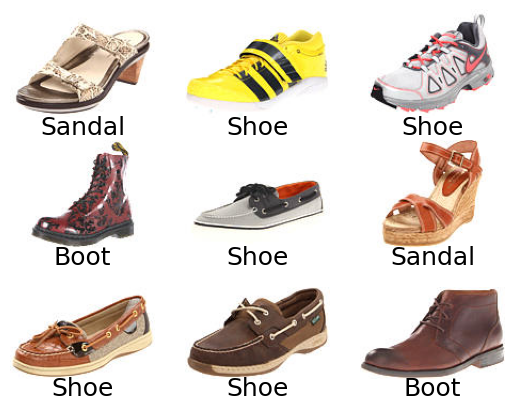

In [ ]:
predictions = model.predict(X_test)
predict_labels = np.argmax(predictions, axis = 1)
for i in range(9):
    plt.subplot(3, 3, i+1)
    plt.imshow(X_test[i])
    # supaya grafik-grafik koordinat ga di show
    plt.axis('off')

    # transform=plt.gca().transAxes itu ngambil current subplot trs ambil axisnya
    # 0.5 itu x-nya
    # -0.15 itu y-nya
    # classes predict labels itu hasil predictionnya
    # fontsize sama ha cmn buat percantik textnya aja
    plt.text(0.5, -0.15, classes[predict_labels[i]], fontsize=18, ha='center', transform=plt.gca().transAxes)

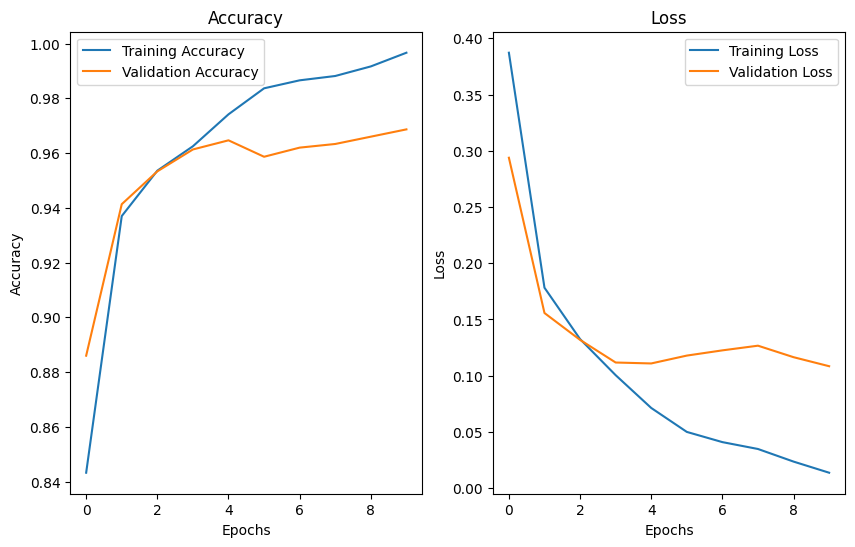

In [ ]:
plt.figure(figsize=(10,6))

plt.subplot(1,2,1)
plt.plot(history.history['Accuracy'], label='Training Accuracy')
plt.plot(history.history['val_Accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Accuracy')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss')
plt.legend()

plt.show()

# bisa dilihat graphnya mgkin agak berjarak ya dari accuracynya
# tapi itu dikarenakan accuracynya aja yg terlalu tinggi
# jadi balanced, not overfitting and underfitting